In [1]:
# !kaggle competitions download -c facebook-recruiting-iv-human-or-bot

In [2]:
# from zipfile import ZipFile

In [3]:
# with ZipFile('facebook-recruiting-iv-human-or-bot.zip', 'r') as zipObj:
#     zipObj.extractall()

In [4]:
# with ZipFile('bids.csv.zip', 'r') as zipObj:
#     zipObj.extractall()
    
# with ZipFile('test.csv.zip', 'r') as zipObj:
#     zipObj.extractall()
    
# with ZipFile('train.csv.zip', 'r') as zipObj:
#     zipObj.extractall()

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

In [6]:
train_df = pd.read_csv('./train.csv')
train_df.head()

,bidder_id,payment_account,address,outcome
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0


In [7]:
train_df[train_df["outcome"] == 1.0]

,bidder_id,payment_account,address,outcome
21,5354c02817e47f28e60e44a40ca5e48dll4sz,1862ef3b7965993cc975a1161010e810w2bwo,58e5dc4d38d886f6c7abf0c264a51cb7alhj2,1.0
50,9434778d2268f1fa2a8ede48c0cd05c097zey,ee3295c7b31a1e9116ebf0cf2df68ed1ac8ts,627fe7481f01372c02333477471cb237qt2vf,1.0
51,aabc211b4cf4d29e4ac7e7e361371622pockb,a3d2de7675556553a5f08e4c88d2c228pxtr6,a3d2de7675556553a5f08e4c88d2c228bxn98,1.0
58,68d468e15e0de0bab9694cdca8e799eb2j8kn,a3d2de7675556553a5f08e4c88d2c228vf08k,767150cd5a97ed796bfc58456f5500250dsv7,1.0
77,1cbd9081de4481ada66f1853737f7684ddjd1,a3d2de7675556553a5f08e4c88d2c228buft1,a3d2de7675556553a5f08e4c88d2c228pijoz,1.0
...,...,...,...,...
1936,458c8c4e10e5c1b29e3fbe5ee56d46e8y3fb3,97ee873207ff7c57e70c50637c93c11eqsyjy,480aca092e44d3e23a015e51d8e7daa4hhcss,1.0
1942,022ac3a7ce986049d9a4bede83ccf9ddctvg6,57aec2c76d2db80cf61c2543d15ef9f82tplj,c57c64adcc43ce50d99f184d87981d87yz2di,1.0
1968,6c11cc7744fb52a632306ca8bf966cd1e4zxx,0875307e1731af94b3b64725ad0deb7dg45aa,a10741281aa478c1f3ce0c965debb359rzk56,1.0
1970,17a321c4a0d925ca80507effa52330ac5n5r7,9366947fbdda1fc29952043326a70b07z0n0q,a3d2de7675556553a5f08e4c88d2c228zf3p2,1.0


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2013 entries, 0 to 2012
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bidder_id        2013 non-null   object 
 1   payment_account  2013 non-null   object 
 2   address          2013 non-null   object 
 3   outcome          2013 non-null   float64
dtypes: float64(1), object(3)
memory usage: 63.0+ KB


In [9]:
train_df.describe(include=np.number)

,outcome
count,2013.000000
mean,0.051167
std,0.220394
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [10]:
train_df.describe(include=object)

,bidder_id,payment_account,address
count,2013,2013,2013
unique,2013,2013,2013
top,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4
freq,1,1,1


In [11]:
train_df.isna().sum().sum()

0

In [12]:
train_df.shape

(2013, 4)

<AxesSubplot:xlabel='outcome', ylabel='count'>

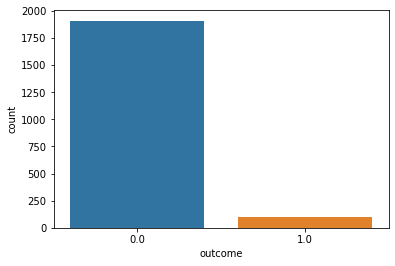

In [13]:
sns.countplot(data=train_df, x='outcome')

In [14]:
bid_df = pd.read_csv('./bids.csv')
bid_df.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3


In [15]:
# train_df["outcome"][train_df["bidder_id"] == '668d393e858e8126275433046bbd35c6tywop']

In [16]:
def get_sameness(series):
    """
    Computes sameness. 
    """
    if len(series) == 0:
        return 0.5
    vc = series.value_counts()
    p_vc = vc / len(series)
    res = np.dot(vc.values, p_vc.values)
    return res / len(series)

In [17]:
get_sameness(bid_df[bid_df["bidder_id"] == "5354c02817e47f28e60e44a40ca5e48dll4sz"]["device"])

0.0748145660999359

In [18]:
bid_df[bid_df["bidder_id"] == "5354c02817e47f28e60e44a40ca5e48dll4sz"]["auction"]

2519801    1l3p3
2543489    62d9x
2556174    62d9x
2562889    436hc
2856456    1l3p3
           ...  
5204905    gz40m
5206190    obbny
5211672    cc5fs
5214706    gz40m
5216612    1l3p3
Name: auction, Length: 181, dtype: object

In [45]:
# !pip install numba

In [48]:
def preprocess_data(df, bid_df):
    # unique = {}
    # col_to_iter = ["bidder_id", "auction", "device", "ip", "url"]
    # for col in col_to_iter:
    #     unique[col] = df[col].rename(f"{col}_unique")
    #     unique[col] = unique[col].map(unique[col].value_counts() == 1)
    bidder_id_count = df["bidder_id"].rename("bidder_id_count")
    bidder_id_count = bidder_id_count.map(bidder_id_count.value_counts())
    sameness = {}
    col_to_iter_2 = ["auction", "merchandise", "device", "country", "ip", "url"]
#     param = {}
#     for col in col_to_iter_2:
#         param[col] = np.zeros(len(df), dtype=object)
#         i = 0
#         for bidder_id in df["bidder_id"]:
#             print(col, i)
#             series = bid_df[bid_df["bidder_id"] == bidder_id][col]
#             param[col][i] = series
#             # print(series)
#             i += 1
#         print(param[col])
            
#     print(param)
#     print(sameness)
            
#     for col in col_to_iter_2:
#         sameness[col] = get_sameness(param[col])
#         print(col)
        
    for col in col_to_iter_2:
        sameness[col] = np.zeros(len(df), dtype=object)
        i = 0
        for bidder_id in df["bidder_id"]:
            print(col, i)
            sameness[col][i] = get_sameness(bid_df[bid_df["bidder_id"] == bidder_id][col])
            i += 1
        print(sameness[col])
        
    sameness = pd.DataFrame(sameness)
    bidder_id_count = pd.DataFrame(bidder_id_count)
    sameness = pd.concat([sameness, bidder_id_count])
    return sameness

In [ ]:
sameness = preprocess_data(train_df, bid_df)

auction 0
auction 1
auction 2
auction 3
auction 4
auction 5
auction 6
auction 7
auction 8
auction 9
auction 10
auction 11
auction 12
auction 13
auction 14
auction 15
auction 16
auction 17
auction 18
auction 19
auction 20
auction 21
auction 22
auction 23
auction 24
auction 25
auction 26
auction 27
auction 28
auction 29
auction 30
auction 31
auction 32
auction 33
auction 34
auction 35
auction 36
auction 37
auction 38
auction 39
auction 40
auction 41
auction 42
auction 43
auction 44
auction 45
auction 46
auction 47
auction 48
auction 49
auction 50
auction 51
auction 52
auction 53
auction 54
auction 55
auction 56
auction 57
auction 58
auction 59
auction 60
auction 61
auction 62
auction 63
auction 64
auction 65
auction 66
auction 67
auction 68
auction 69
auction 70
auction 71
auction 72
auction 73
auction 74
auction 75
auction 76
auction 77
auction 78
auction 79
auction 80
auction 81
auction 82
auction 83
auction 84
auction 85
auction 86
auction 87
auction 88
auction 89
auction 90
auction 9

In [48]:
bid_df.drop(columns=['bid_id', 'time'], inplace=True, axis=1)

In [49]:
bid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7656334 entries, 0 to 7656333
Data columns (total 7 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   bidder_id    object
 1   auction      object
 2   merchandise  object
 3   device       object
 4   country      object
 5   ip           object
 6   url          object
dtypes: object(7)
memory usage: 408.9+ MB


In [50]:
bid_df.describe()

,bidder_id,auction,merchandise,device,country,ip,url
count,7656334,7656334,7656334,7656334,7647475,7656334,7656334
unique,6614,15051,10,7351,199,2303991,1786351
top,f5b2bbad20d1d7ded3ed960393bec0f40u6hn,jqx39,mobile,phone4,in,37.95.134.218,vasstdc27m7nks3
freq,515033,537347,2126587,706573,1788731,61203,3499409


In [165]:
bid_df["url"].value_counts()

vasstdc27m7nks3    3499409
7zyltxp0hh36vpp      22297
z3qzkki3dy6ndjb      17909
q0skvht51258k93      12350
vwjvx8n5d6yjwlj      10446
                    ...   
b3307fr9zu81hi3          1
ap505r84b14k48d          1
3xjh6zfc67o6bk2          1
3wjccdhsgfjb83p          1
wgggpdg2gx5pesn          1
Name: url, Length: 1786351, dtype: int64

In [43]:
bid_df.isna().sum()

bidder_id         0
auction           0
merchandise       0
device            0
time              0
country        8859
ip                0
url               0
dtype: int64

In [44]:
bid_df.shape

(7656334, 8)

In [23]:
test_df = pd.read_csv('./test.csv')
test_df.head()

,bidder_id,payment_account,address
0,49bb5a3c944b8fc337981cc7a9ccae41u31d7,a3d2de7675556553a5f08e4c88d2c228htx90,5d9fa1b71f992e7c7a106ce4b07a0a754le7c
1,a921612b85a1494456e74c09393ccb65ylp4y,a3d2de7675556553a5f08e4c88d2c228rs17i,a3d2de7675556553a5f08e4c88d2c228klidn
2,6b601e72a4d264dab9ace9d7b229b47479v6i,925381cce086b8cc9594eee1c77edf665zjpl,a3d2de7675556553a5f08e4c88d2c228aght0
3,eaf0ed0afc9689779417274b4791726cn5udi,a3d2de7675556553a5f08e4c88d2c228nclv5,b5714de1fd69d4a0d2e39d59e53fe9e15vwat
4,cdecd8d02ed8c6037e38042c7745f688mx5sf,a3d2de7675556553a5f08e4c88d2c228dtdkd,c3b363a3c3b838d58c85acf0fc9964cb4pnfa


In [24]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4700 entries, 0 to 4699
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   bidder_id        4700 non-null   object
 1   payment_account  4700 non-null   object
 2   address          4700 non-null   object
dtypes: object(3)
memory usage: 110.3+ KB


In [26]:
test_df.describe()

,bidder_id,payment_account,address
count,4700,4700,4700
unique,4700,4700,4700
top,49bb5a3c944b8fc337981cc7a9ccae41u31d7,a3d2de7675556553a5f08e4c88d2c228htx90,5d9fa1b71f992e7c7a106ce4b07a0a754le7c
freq,1,1,1


In [28]:
test_df.isna().sum()

bidder_id          0
payment_account    0
address            0
dtype: int64

In [29]:
test_df.shape

(4700, 3)

In [109]:
test_bidder_in_train = 0
def inc_bidder(x):
    global test_bidder_in_train
    if x in train_df['bidder_id']:
        test_bidder_in_train += 1
test_df['bidder_id'].apply(inc_bidder)
test_bidder_in_train

0

In [108]:
test_acc_in_train = 0
def inc_accr(x):
    global test_acc_in_train
    if x in train_df['payment_account']:
        test_acc_in_train += 1
test_df['payment_account'].apply(inc_accr)
test_acc_in_train

0

In [99]:
test_address_in_train = 0
def inc_address(x):
    global test_address_in_train
    if x in train_df['address']:
        test_address_in_train += 1
test_df['address'].apply(inc_address)
test_address_in_train

0